In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
df = pd.read_csv("attacks.csv",encoding='latin1')

In [3]:
df.shape

(25723, 24)

In [4]:
#Minima limpieza de nombre de columnas.
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns = df.columns.str.lower().str.replace(':', '_')
df.columns = df.columns.str.lower().str.replace('.', '_')



In [5]:
#elimino mierda
df.drop(columns=['unnamed__23'], inplace=True)
df.drop(columns=['unnamed__22'], inplace=True)

In [6]:
#Calculo filas con 90% de valores nulos y las elimine.
porcentaje_nulos = df.isnull().sum(axis=1) / len(df.columns)
filas_a_eliminar=porcentaje_nulos[porcentaje_nulos>0.9]
df.drop(filas_a_eliminar.index , inplace=True)

In [7]:
#elimino las filas donde no tengan esos valores
valores_validos= ["M", "F"]
df = df[df["sex"].isin(valores_validos)]

In [8]:
#elimino las filas donde NO esten esos valores
valores_validos= ["Unprovoked", "Provoked","Invalid","Sea Disaster","Boating"]
df = df[df['type'].isin(valores_validos)]

In [9]:
df[df['country'].str.contains(r"indian", case=False, na=False)]
(df.country).unique()

array(['USA', 'AUSTRALIA', 'MEXICO', 'BRAZIL', 'ENGLAND', 'SOUTH AFRICA',
       'THAILAND', 'COSTA RICA', 'MALDIVES', 'BAHAMAS', 'ECUADOR',
       'NEW CALEDONIA', 'MALAYSIA', nan, 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'SPAIN', 'SOLOMON ISLANDS', 'JAPAN', 'EGYPT',
       'ST HELENA, British overseas territory', 'REUNION',
       'FRENCH POLYNESIA', 'UNITED KINGDOM', 'UNITED ARAB EMIRATES',
       'PHILIPPINES', 'INDONESIA', 'CHINA', 'COLUMBIA', 'CAPE VERDE',
       'Fiji', 'DOMINICAN REPUBLIC', 'CAYMAN ISLANDS', 'ARUBA',
       'MOZAMBIQUE', 'FIJI', 'PUERTO RICO', 'ITALY', 'FRANCE',
       'PAPUA NEW GUINEA', 'TRINIDAD & TOBAGO', 'KIRIBATI', 'ISRAEL',
       'DIEGO GARCIA', 'TAIWAN', 'JAMAICA', 'PALESTINIAN TERRITORIES',
       'GUAM', 'SEYCHELLES', 'BELIZE', 'NIGERIA', 'TONGA', 'SCOTLAND',
       'CANADA', 'SAUDI ARABIA', 'CHILE', 'ANTIGUA', 'KENYA', 'RUSSIA',
       'TURKS & CAICOS', 'UNITED ARAB EMIRATES (UAE)', 'SAMOA', 'AZORES',
       'SOUTH KOREA', 'MALTA', 'VIETNAM', 'MAD

In [10]:
# Limpieza columna country
df["country"] = df["country"].str.strip()
df["country"] = df["country"].str.capitalize()
df.loc[df["country"] == "St helena, british overseas territory", "country"] = "St helena"
df[df["country"] == "Diego garcia"]
df.loc[655, "area"] = "Diego garcia"
df.loc[df["country"] == "Diego garcia", "country"] = "United kingdom"
df[df["country"] == "Turks & caicos"]
df.loc[1880, "area"] = "Turks & caicos"
df.loc[df["country"] == "Turks & caicos", "country"] = "United kingdom"
df.loc[df["country"] == r"United arab emirates (uae)", "country"] = "United arab emirates"
df[df["country"] == "British virgin islands"]
df.loc[df["country"] == "British virgin islands", "country"] = "United kingdom"
df[df["country"] == "Grand cayman"]
df.loc[df["country"] == "Grand cayman", "country"] = "United kingdom"
df[df["country"] == "Egypt / israel"]
df.loc[df["country"] == "Egypt / israel", "country"] = "Egiypt"
df[df["country"] == "Northern arabian sea"]
df = df[df["country"] != "Northern arabian sea"]
df[df["country"] == "North atlantic ocean"]
df.loc[df["country"] == "British isles", "country"] = "United kingdom"
df[df["country"] ==  "Johnston island"]
df.loc[df["country"] == "Johnston island", "country"] = "EEUU"
df.loc[df["country"] == "Papua new guinea"] = "New guinea"
df[df["country"] == "Admiralty islands"]
df.loc[df["country"] == "Admiralty islands"] = "New guinea"
df.loc[df["country"] == "British west indies", "country"] = "United kingdom"
df.loc[df["country"] == "Red sea / indian ocean", "country"] = "Red sea"
df[df["country"] == "Andaman / nicobar islandas"]
df.loc[4140, "area"] = "Andaman / nicobar islandas"
df.loc[df["country"] == "Andaman / nicobar islandas", "country"] = "Indian"
df.loc[df["country"] == "Indian ocean", "country"] = "Indian"
df.loc[df["country"] == "India", "country"] = "Indian"
df.loc[df["country"] == "Andaman / Between portugal & india", "country"] = "Indian"
df.loc[df["country"] == "Sudan?", "country"] = "Sudan"
df.loc[df["country"] == "Netherlands antilles", "country"] = "Netherlands"
df.loc[df["country"] == "Northern mariana islands", "country"] = "EEUU"
df.loc[df["country"] == r" philippines", "country"] = "philippines"
df[df["country"] == "Solomon islands / vanuatu"]
df.loc[4140, "area"] = "vanuatu"
df.loc[df["country"] == "Solomon islands / vanuatu", "country"] = "Solomon"
df.loc[df["country"] == "Bay of bengal", "country"] = "indian"
df.loc[df["country"] == "Mid-pacifc ocean", "country"] = "Central pacific"
df[df["country"] == "Italy / croatia"]
df.loc[df["country"] == "Italy / croatia", "country"] = "Croatia"
df[df["country"] == "San domingo"]
df.loc[df["country"] == "San domingo", "country"] = "Dominican republic"
df[df["country"] == "Reunion island"]
df.loc[df["country"] == "Reunion island", "country"] = "France"
df.loc[df["country"] == "fiji", "country"] = "fyji"
df.loc[df["country"] == "Antigua", "country"] = "Antigua and Barbuda"
df.loc[df["country"] == "Azores", "country"] = "Portugal"
df[df["country"] == "Okinawa"]
df.loc[4616, "area"] = "Okinawa"
df.loc[5054, "area"] = "Okinawa"
df.loc[df["country"] == "Okinawa ", "country"] = "Japan"
df.loc[df["country"] == "Hong kong ", "country"] = "Japan"
df.loc[df["country"] == "Mayotte ", "country"] = "France"
df.loc[df["country"] == "Martinique ", "country"] = "France"
df[df["country"] == "Falkland islands"]
df.loc[5519, "area"] = "Falkland islands"
df.loc[df["country"] == "Falkland islands ", "country"] = "United kingdom"
df[df["country"] == "Crete"]
df.loc[5525, "area"] = "Crete"
df.loc[5597, "area"] = "Crete"
df.loc[df["country"] == "Crete ", "country"] = "Greece"
df.loc[df["country"] == "British new guinea ", "country"] = "New guinea"
df[df["country"] == "Ocean"]
df.drop(5748, inplace=True)
df[df["country"] == "Indian ocean?"]
df.drop(5894, inplace=True)
df[df["country"] == "Guinea"]
df.loc[df["country"] == "Red sea?", "country"] = "Red sea"
df.loc[df["country"] == r"Ceylon (sri lanka)", "country"] = "Ceylon"
df.drop([5952, 6144,6164,5978,6049,6059,6083,6149,6234,6153,6158,6170,6215,6291], inplace=True)


df.dropna(subset=["country"], inplace=True)

In [11]:
#Limpiando la columna activity.
(df.activity.isnull().sum().sum()) #un total de 367 causas desconocidas por los ataques de tiburones.
df.activity=df.activity.fillna("Unknow") # rellenamos los valores nulos con un string.


In [12]:
#limpiando la columna area
df["area"] = df["area"].str.capitalize()
(df.area.isnull().sum().sum()) # un total de 331 valores desconocidos
df.activity=df.activity.fillna("Unknow") # rellenando los valores nulos con un string.

In [15]:
filas_a_eliminar = df[df['year'] == "New guinea"]

In [16]:
#limpiando columna year
(df.year.isnull().sum().sum()) # 2 valores nulos
df.dropna(subset=["year"], inplace=True)
df['year'] = df['year'].astype(int)
df[df['year'] == 0]# revisando los valores 0 y rellenandolos con datos correctos-
df.loc[6296, "year"] = "1906"
df.loc[6276	, "year"] = "1930"
df.loc[6267, "year"] = "1940"
df.loc[6266, "year"] = "1940"
df.loc[6265, "year"] = "1941"
df.loc[6253, "year"] = "1957"
df.loc[6250, "year"] = "1958"
df.loc[6245, "year"] = "1959"
df.loc[6244, "year"] = "1960"
df.loc[6243, "year"] = "1960"
df.loc[6242, "year"] = "1960"
df.loc[6240, "year"] = "1961"
df.loc[6239, "year"] = "1962"
df.loc[6238, "year"] = "1962"
df.loc[6235, "year"] = "1963"
df.loc[6226, "year"] = "1975"
df.loc[6225, "year"] = "1987"
df.loc[6224, "year"] = "1987"
df.loc[6222, "year"] = "1996"
df.loc[6216, "year"] = "2003"
df.loc[6214, "year"] = "1950"
df.loc[6209, "year"] = "1960"
df.loc[6200, "year"] = "2009"
df.loc[6194, "year"] = "1908"
df.loc[6191, "year"] = "2012"

ValueError: invalid literal for int() with base 10: 'New guinea'

In [17]:
#limpiando columna edad
mapeo_edades = {"teen": "10",
    "20s": "20",
    "30s": "30",
    "40s": "40",
    "7 or 8": "7",
    " ": "1",
    "8 or 10": "8",
    "young": "1",
    "50": "50",
    "  ": "1",
    "25 or 28": "25",
    "X": "1",
    "17 & 35": "17",
    "50 & 30": "50",
    "30 & 32": "30",
    "21, 34,24 & 35": "21",
    "37, 67, 35, 27,  ? & 27": "37",
    "33 & 37" : "33",
    "13 or 18": "13",
    "(adult)" : "10",
    "2½": "2",
    "23 & 26": "23",
     "25 to 35": "25",
     "9 months" : "1",
     "? & 19": "15",
     "middle-age": "1",
     "34 & 19": "34",
     "36 & 23": "36",
     "10 or 12": "10",
     "A.M.": "1",
     "9 or 10": "9",
    "Both 11": "11",
     "F": "1",
     "17 & 16": "17",
     "?    &   14": "14",
     "31 or 33": "31",
     "33 & 26": "33",
     "young": "1",
     "81": "81",
     " 43": "43",
     "adult": "10",
     "MAKE LINE GREEN": "1",
     "2 to 3 months": "1",
     "9 & 12": "9",
     "28 & 26": "28",
     "18 to 22": "18",
     "46 & 34": "46",
     "6½": "6",
     "30 or 36": "30",
     "\xa0 ": "1",
     "84": "84",
     "36 & 26": "36",
     "Teens": "6",
     "28, 23 & 30": "28",
     "12 or 13": "12",
     "33 or 37": "33",
     "18 or 20": "18",
     "86": "86",
     "74": "74",
     "18 months": "2",
     "72": "6",
     "60s": "60",
     "82": "82",
     "21 & ?": "21",
     "mid-30s": "30",
     ">50": "50",
     "67": "67",
     "20 ": "20",
     "21 or 26": "21",
     "45 ": "45",
     "74 ": "74",
     "Ca. 33": "33",
     "mid-20s": "20",
     "Elderly": "1",
     "87": "87",
     "23 & 20": "23",
     "16 to 18": "16",
     "32 & 30": "32",
     "60's": "60",
     "20?": "20",
     " 28": "28",
    "Teen": "9",
    '"middle-age"': "1",
    '"young"': "1",
     "7      &    31": "7",
     " 30": "30",
    "50s" :"50",
     "13 or 14": "13"}

df["age"] = df["age"].map(mapeo_edades).fillna(df["age"]) 


In [18]:
#columna fatal
df["fatal_(y/n)"].value_counts()
df.loc[df["fatal_(y/n)"] == " N", "fatal_(y/n)"] = "N"
df.loc[df["fatal_(y/n)"] == "y", "fatal_(y/n)"] = "Y"
df.drop(df[df['fatal_(y/n)'] == "UNKNOWN"].index, inplace=True)
df.drop(df[df['fatal_(y/n)'] == "M"].index, inplace=True)
df.drop(df[df['fatal_(y/n)'] == "2017"].index, inplace=True)

In [19]:
#Trabajando con columna time.
(df.time.isnull().sum().sum())
df.time.fillna("Unknow", inplace=True)
df.time.value_counts()


Unknow         2681
Afternoon       176
11h00           124
New guinea      114
Morning         110
               ... 
14h37             1
10h07             1
13h53             1
13h23             1
19h00-20h00       1
Name: time, Length: 356, dtype: int64

In [20]:
#Trabajando con la columna tiempo
diccionario_tiempo={
"18h00": "afternon",
 '14h00  -15h00': "afternon",
 '07h45': "morning",
 'Unknow': "Unknow",
 'Late afternoon': "afternon",
 '17h00': "afternon",
 '14h00': "morning",
 'Morning': "morning",
 '15h00': "afternon",
 '08h15': "morning",
 '11h00': "morning",
 '10h40': "morning",
 '16h50': "afternon",
 '09h30': "morning",
 'Afternoon': "afternon",
 '21h50': "night",
 '09h40': "morning",
 '08h00': "morning",
 '17h35': "afternon",
 '15h30': "afternon",
 '07h30': "morning",
 '19h00, Dusk': "night",
 'Night': "night",
 '16h00': "afternon",
 '15h01': "afternon",
 '12h00': "morning",
 '13h45': "morning",
 '23h30': "night",
 '09h00': "morning",
 '14h30': "afternon",
 '18h30': "afternon",
 '12h30': "morning",
 '16h30': "afternon",
 '18h45': "afternon",
 '06h00': "morning",
 '10h00': "morning",
 '10h44': "morning",
 '10h30': "morning",
 '13h19': "morning",
 'Midday': "fuera",
 '13h30': "morning",
 '10h45': "morning",
 '11h20': "morning",
 '11h45': "morning",
 '19h30': "afternon",
 '08h30': "morning",
 '15h45': "afternon",
 'Shortly before 12h00': "morning",
 '17h34': "afternon",
 '17h10': "afternon",
 '11h15': "morning",
 '08h50': "morning",
 '17h45': "afternon",
 '13h00': "morning",
 '10h20': "morning",
 '13h20': "morning",
 '07h00': "morning",
 '02h00': "morning",
 '09h50': "morning",
 '11h30': "morning",
 '17h30': "afternon",
 '9h00': "morning",
 '10h43': "morning",
 'After noon': "night",
 '15h15': "afternon",
 '15h40': "afternon",
 '19h05': "afternon",
 '1300': "morning",
 '14h30 / 15h30': "morning",
 '22h00': "night",
 '16h20': "afternon",
 '14h34': "afternon",
 '15h25': "afternon",
 '14h55': "afternon",
 '17h46': "afternon",
 'Morning ': "morning",
 '15h49': "afternon",
 '19h00': "afternon",
 'Midnight': "night",
 '09h30 / 10h00': "morning",
 '10h15': "morning",
 '18h15': "afternon",
 '04h00': "morning",
 '14h50': "afternon",
 '13h50': "morning",
 '19h20': "afternon",
 '10h25': "morning",
 '10h45-11h15': "morning",
 '16h45': "afternon",
 '15h52': "afternon",
 '06h15': "morning",
 '14h40': "afternon",
 '19h45': "afternon",
 '10h10': "morning",
 '08h45': "morning",
 'Evening': "night",
 '12h10': "morning",
 '18h05': "afternon",
 '11h41': "morning",
 '12h25': "morning",
 '17h51': "afternon",
 '16h12': "afternon",
 '12h45': "morning",
 '10h50': "morning",
 '14h15': "morning",
 '09h45': "morning",
 '06h45': "morning",
 '05h00': "morning",
 '03h30': "morning",
 'Sometime between 06h00 & 08hoo': "morning",
 '06h30': "morning",
 '17h20': "afternon",
 '20h00': "night",
 '16h40': "afternon",
 '11h10': "morning",
 'Early afternoon': "afternon",
 '17h50': "afternon",
 '07h00 - 08h00': "morning",
 '18h15-18h30': "afternon",
 '17h01': "afternon",
 '09h57': "morning",
 '08h20': "morning",
 '17h58': "afternon",
 'New guinea': "fuera",
 '20h30': "night",
 '15h19': "afternon",
 '10h55': "morning",
 '15h55': "afternon",
 '23h00': "night",
 '12h40': "morning",
 '13h55': "morning",
 '16h05': "afternon",
 '14h10': "afternon",
 '15h20': "afternon",
 '12h50': "morning",
 '14h45': "afternon",
 '13h40': "morning",
 '13h24': "morning",
 '09h00 - 09h30': "morning",
 '0830': "morning",
 '11h40': "morning",
 '08h10': "morning",
 '15h56': "afternon",
 'Just before noon': "night",
 '07h56': "morning",
 '1600': "afternon",
 '17h17': "afternon",
 '16h35': "afternon",
 '09h05': "morning",
 '07h15': "morning",
 '14h20': "afternon",
 '07h20': "morning",
 '19h28': "afternon",
 '12h38': "morning",
 '15h50': "afternon",
 'Early morning': "morning",
 'Dawn': "fuera",
 '05h45': "morning",
 '13h25': "morning",
 '12h20': "morning",
 '13h26': "morning",
 '09h11': "morning",
 '12h15': "morning",
 '13h15': "morning",
 '18h20': "afternon",
 '15h35': "afternon",
 'AM': "morning",
 '13h51': "morning",
 'A.M.': "morning",
 '08h05': "morning",
 '19h15': "afternon",
 '10h35': "morning",
 '15h44': "afternon",
 'Dusk': "fuera",
 '21h00': "night",
 'Lunchtime': "afternon",
 '15j45': "afternon",
 '09h35': "morning",
 '10h27': "morning",
 '10h16': "morning",
 '0500': "morning",
 'Before 07h00': "morning",
 '10h00 -- 11h00': "morning",
 '12h05': "morning",
 '14h21': "afternon",
 '18h50': "afternon",
 '15h53': "afternon",
 '"Just before 11h00"': "morning",
 '11h115': "morning",
 '13h42': "morning",
 '20h15': "night",
 '12h39': "morning",
 '07h05': "morning",
 'Sunset': "fuera",
 '13h05': "morning",
 '11h50': "morning",
 '"Evening"': "night",
 'Just before sundown': "fuera",
 '17h55': "afternon",
 '22h30': "night",
 '17h15': "afternon",
 '16h10': "afternon",
 '11h30 ': "morning",
 '06h10': "morning",
 '16h15': "afternon",
 'Between 05h00 and 08h00': "morning",
 '07h08': "morning",
 '17h00 or 17h40': "afternon",
 '11h05': "morning",
 '>08h00': "morning",
 '--': "fuera",
 '12h02': "morning",
 '12h55': "morning",
 '16h14': "afternon",
 '17h11': "afternon",
 '00h30': "morning",
 '14h37': "afternon",
 '10h07': "morning",
 '13h53': "morning",
 '13h23': "morning",
 'Just after 12h00': "morning",
 '02h30': "morning",
 '08h40': "morning",
 '11h56': "morning",
 '14h35': "afternon",
 ' ': "fuera",
 'Early Morning': "morning",
 'Shortly after midnight': "afternon",
 '14h25': "afternon",
 '\xa0 ': "fuera",
 '06h47': "morning",
 '09h00 -10h00': "morning",
 '20h45 (Sunset)': "night",
 'Late morning': "morning",
 '18h40': "afternon",
 '13h14': "morning",
 '13h06': "morning",
 'Shortly before 13h00': "morning",
 '12h34': "morning",
 '11h53': "morning",
 '8:04 pm': "night",
 '12h46': "morning",
 '12h48': "morning",
 '17h42': "afternon",
 '12h35': "morning",
 'Possibly same incident as 2000.08.21': "fuera",
 'After Dusk': "fuera",
 '07h50': "morning",
 '11h57': "morning",
 'Noon': "night",
 '17h40': "afternon",
 '11h25': "morning",
 '18h25': "afternon",
 '10h28': "morning",
 '09h15': "morning",
 '14h16': "afternon",
 'P.M.': "afternon",
 '09h55': "morning",
 '2 hours after Opperman': "fuera",
 '15h05': "afternon",
 '09h30 ': "morning",
 'Mid afternoon': "afternon",
 'Mid morning': "morning",
 '11h48': "morning",
 '11h00 / 11h30': "morning",
 '07h19': "morning",
 '13h37': "morning",
 '11h06': "morning",
 '"Night"': "night",
 '18h30?': "afternon",
 '11h58': "morning",
 '11h51': "morning",
 '18h12': "afternon",
 '07h10': "morning",
 '03h00': "morning",
 '07h40': "morning",
 '12h33': "morning",
 '30 minutes after 1992.07.08.a': "fuera",
 '>06h45': "morning",
 '15h06': "afternon",
 '12h54': "morning",
 'Between 06h00 & 07h20': "morning",
 '16h55': "afternon",
 '05h40': "morning",
 '<07h30': "morning",
 '21h30': "night",
 '17h00 Sunset': "afternon",
 'Nightfall': "night",
 'X': "fuera",
 '08h57': "morning",
 '18h30 (Sunset)': "afternon",
 '06j00': "morning",
 '08h35': "morning",
 '10h22': "morning",
 '02h45': "morning",
 'Prior to 10h37': "morning",
 'Daybreak': 296,
 '18h10': "afternon",
 '>12h00': "morning",
 'Mid-morning': "morning",
 '08h55': "morning",
 '16h30 or 18h00': "afternon",
 'Just before dawn': "afternon",
 ' 14h00': "morning",
 'Daytime': "fuera",
 '06h50': "morning",
 '01h00': "morning",
 'Dark': "fuera",
 '10h00 / 11h00': "morning",
 '"After lunch"': "afternon",
 '15h00 or 15h45': "afternon",
 '>17h00': "afternon",
 '19h00 / 20h00': "afternon",
 '12h45 / 13h45': "morning",
 '14h00 - 15h00': "morning",
 'night': "night",
 '13h10': "morning",
 '09h30 / 15h30': "afternon",
 '08h00 / 09h30': "morning",
 '19h35': "afternon",
 '12h00 to 14h00': "morning",
 '13h35': "morning",
 '10h30 or 13h30': "morning",
 '16h23': "afternon",
 '15h00j': "afternon",
 '11h55': "morning",
 '"After dark"': "fuera",
 '10h00 or 14h00': "morning",
 '19h10': "afternon",
 '16h25': "afternon",
 '2 hrs before sunset': "fuera",
 '18h15 to 21h30': "afternon",
 '1500': "afternon",
 '"shortly before dusk"': "fuera",
 '>14h30': "afternon",
 'Between 11h00 & 12h00': "morning",
 'After 04h00': "afternon",
 '11h01 -time of ship sinking': "morning",
 'Ship aban-doned at 03h10': "morning",
 '19h55': "afternon",
 'After dusk': "fuera",
 'FATAL  (Wire netting installed at local beaches after this incident.)': "fuera",
 'After midnight': "night",
 'Late afternon': "afternon",
 '05h30': "morning",
 '08h58': "morning",
 '"Early evening"': "night",
 'Late Afternoon': "afternon",
 '   ': "fuera",
 'Before daybreak': "fuera",
 'dusk': "fuera",
 'Before 10h30': "morning",
 '06h00 -- 07h00': "morning",
 '01h50': "morning",
 '17h00-18h00': "afternon",
 '19h00-20h00': "afternon",
   
}

df["time"] = df["time"].map(diccionario_tiempo).fillna(df["time"]) 
df.time.value_counts()
time_validos= ["Unknow", "morning","afternon","night"]
df = df[df['time'].isin(time_validos)]
df.time.value_counts()

Unknow      2681
morning     1403
afternon    1197
night        142
Name: time, dtype: int64

In [21]:
#columna injury
(df.injury.isnull().sum().sum())
df.dropna(subset=['injury'], inplace=True)

In [22]:
#columna investigador
(df.investigator_or_source.isnull().sum().sum())
df.dropna(subset=['investigator_or_source'], inplace=True)

In [23]:
df = df.dropna(subset=["species"])
df['species'] = df['species'].str.lower()
def clean_species(x):
    match = re.search(r"shark?s?\b|\b\w+\b shark?s?", x)
    return match.group() if match else None


df["species"] = df["species"].apply(clean_species)

In [24]:
#columna de species
especias={'white shark':"white shark",
 'm shark':"shark",
 'tiger shark':"tiger shark",
 'lemon shark':'lemon shark',
 'bull shark':'bull shark',
 'reef shark':'reef shark',
 'nurse shark':'nurse shark',
 'shark':'shark',
 'wobbegong shark':'wobbegong shark',
 'blacktip shark': 'blacktip shark',
 'a shark':'shark',
 'galapagos shark':'galapagos shark',
 '2m shark':'shark',
 '2m sharks':'shark',
 'small shark':'small shark',
 'cookiecutter shark':'cookiecutter shark',
 'spinner shark':'spinner shark',
 'whitetip shark':'whitetip shark',
 'sandtiger shark':'sandtiger shark',
 'blue shark':'blue shark',
 'no shark':'shark',
 'gill shark':'gill shark',
 '3m shark':'shark',
 '3m sharks':'shark',
 'sevengill shark':'sevengill shark',
 'angel shark':'angel shark',
 'dogfish shark':'dogfish shark',
 'mako shark':'mako shark',
 'whaler shark':'whaler shark',
 'silky shark':'silky shark',
 'juvenile shark':'juvenile shark',
 'hammerhead shark':'hammerhead shark',
 'but shark':'bull shark',
 'foot shark':'foot shark',
 'raggedtooth shark':'ragged tooth shark',
 'goblin shark':'goblin shark',
 'metre shark':'metre shark',
 'sandbar shark':'sandbar shark',
 '1m shark':'shark',
 'salmon shark':'salmon shark',
 'porbeagle shark':'porbeagle shark',
 'jackson shark':'jackson shark',
 '30kg shark':'shark',
 'zambesi shark':'zambezi shark',
 'thresher shark':'thresher shark',
 'whale shark':'whale shark',
 'kg shark':'shark',
 'cutter shark':'cutter shark',
 'dusky shark':'dusky shark',
 'smoothhound shark':'smoothhound shark',
 'as shark':'shark',
 'sand shark':'sand tiger shark',
 'same shark':'shark',
 'copper shark':'copper shark',
 '2 shark':'shark',
 '2 sharks':'shark',
 'brown shark': 'brown shark',
 'colored shark':'shark',
 'captive shark':'shark',
 'bonnethed shark':'bonnethead shark',
 'finned shark':'finned shark',
 'young shark':'shark',
 'leopard shark':'leopard shark',
 'unidentified shark':'shark',
 'grey shark':'grey shark',
 'two shark':'shark',
 'lb shark':'shark',
 'gaffed shark':'shark',
 'zambezi shark':'zambezi shark',
 'gray shark':'shark',
 'carpet shark':'carpet shark',
 'sharks':'shark',
 'dog shark':'shark',
 'for shark':'shark',
 '8 shark':'shark',
 '8 sharks':'shark',
 'horn shar':'shark',
 'whitetip shar':'whitetip shakr',
 'banjo shark':'banjo shark',
 'hooked shark':'hooked shark',
 'larger shark':'shark',
 'carcharinid shark': 'carcharhinus shark',
 'another shark':'shark',
 'of shark':'shark',
 'little shark':'shark',
 '5m shark':'shark',
 '5m sharks':'shark',
 'bonita shark':'shark',
 'basking shark':'Cetorhinus maximus',
 'nose shark':'shark',
 'nosed shark':'shark',
 '3 shark':'shark',
 '3 sharks':'shark',
 'cocktail shark':'shark',
 'carcharhinid shark':"carcharhinid shark",
 'whiptail shark':'shark',
 'the shark':'shark',
 'saw shark':'shark',
 'from shark':'shark',
 'ground shark':'shark',
 'large shark':'shark',
 'silvertip shark':'carcharhinid shark',
 'tipped shark':'tipped shark',
 'nose sharks': 'shark',
 'Cetorhinus maximus':"shark",
 'leopard sharks':"leopard shark",
 'of sharks':"shark",
 'zambesi sharks':"zambezi shark", 
 'whitetip shakr':"whitetip shark",
 'for sharks':"shark",
 'blacktip sharks':"blacktip shark",
 'hammerhead sharks':"hammerhead shark",
 'blue sharks':"blue shark",
}
df["species"] = df["species"].map(especias).fillna(df["species"])
df.species.unique()

array(['white shark', 'shark', 'tiger shark', 'lemon shark', 'bull shark',
       'reef shark', None, 'nurse shark', 'wobbegong shark',
       'blacktip shark', 'galapagos shark', 'small shark',
       'cookiecutter shark', 'spinner shark', 'whitetip shark',
       'sandtiger shark', 'blue shark', 'gill shark', 'sevengill shark',
       'angel shark', 'dogfish shark', 'mako shark', 'whaler sharks',
       'bull sharks', 'silky shark', 'whaler shark', 'juvenile shark',
       'hammerhead shark', 'foot shark', 'ragged tooth shark',
       'goblin shark', 'metre shark', 'sandbar shark', 'salmon shark',
       'small sharks', 'porbeagle shark', 'jackson shark',
       'zambezi shark', 'thresher shark', 'whale shark', 'cutter shark',
       'dusky shark', 'smoothhound shark', 'tiger sharks',
       'whitetip sharks', 'sand tiger shark', 'reef sharks',
       'copper shark', 'brown shark', 'bonnethead shark', 'finned shark',
       'leopard shark', 'grey shark', 'two sharks', 'carpet shark',

In [25]:
#creo una columna con el rango de años y nuevas etiquetas
# Primero, convierte la columna 'age' a tipo numérico
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Define los bins y las etiquetas
bins = [0, 12, 18, 30, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Elderly']

# Aplica el corte
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [26]:
# creo una columna mes para saber cual es el mes mas peligroso
def extraer_mes(dato):
    match = re.search(r'(\d{4}).(\d{2}).(\d{2})', dato)
    if match:
        return match.group(2)
    else:
        return dato

# Aplica la función a la columna y crea una nueva columna 'mes'
df['mes'] = df['case_number_1'].apply(extraer_mes)
df.loc[df['mes'] == '00', 'mes'] = 'Unknown'     # reemplazo los valores nulos
#me devuelve datos que no son de utilidad con lo cual procedo a borrar esas filas con datos que no sirven.
valores_a_eliminar = ['ND-0136', 'ND-0133', 'ND-0123', 'ND.0110', 'ND.0104', 'ND.0100', 'ND.0091', 'ND.0089', 'ND.0088', 'ND.0087', 'ND.0075', 'ND.0069', 'ND.0068', 'ND.0066', 'ND.0064', 'ND.0063', 'ND.0062', 'ND.0060', 'ND.0055','ND.0083', 'ND.0052','ND.0081','ND.0007', 'ND.0038','ND.0009','ND.0008', 'ND.0037', 'ND.0036', 'ND.0026', 'ND.0006']

# Eliminar las filas que contienen los valores especificados
df = df[~df['mes'].isin(valores_a_eliminar)]

In [27]:
#elimino columnas duplicadas.
df.drop(columns=['case_number_1'], inplace=True)
df.drop(columns=['case_number_2'], inplace=True)
#cambio tipo de dato de original_order.
df['original_order'] = df['original_order'].astype(int)

In [28]:
#eliminamos mas columnas:
df.drop(columns=['case_number'], inplace=True)
df.drop(columns=['date'], inplace=True)

In [29]:
#creamos columna con indice nuevo.
df.insert(0, 'nuevo_indice', range(len(df)))

In [30]:
#creamos una columna con tipo de ataque y su fatalidad
df['tipo_fatal'] = df['type'] +"->"+ df['fatal_(y/n)']

In [31]:
#conseguimos el porcentaje de ataques segun el tipo
df['tipo_fatal'].value_counts(normalize=True) * 100


Unprovoked->N      68.429299
Unprovoked->Y      13.631022
Provoked->N        13.474344
Boating->N          2.781042
Sea Disaster->N     0.470035
Invalid->N          0.391696
Sea Disaster->Y     0.391696
Invalid->Y          0.195848
Provoked->Y         0.195848
Boating->Y          0.039170
Name: tipo_fatal, dtype: float64

In [35]:
# Divide la columna 'investigator_or_source' en dos usando la coma como separador y expande en columnas
split_data = df['investigator_or_source'].str.split(',', expand=True)
df['investigator'] = split_data[0]
df['source'] = split_data[1]

# Convierte las nuevas columnas en categóricas
df['investigator'] = df['investigator'].astype('category')
df['source'] = df['source'].astype('category')

# Agrega la categoría 'unknown' si no está presente
df['investigator'] = df['investigator'].cat.add_categories(['unknown'])
df['source'] = df['source'].cat.add_categories(['unknown'])

# Rellena los valores nulos con 'unknown'
df['investigator'].fillna('unknown', inplace=True)
df['source'].fillna('unknown', inplace=True)


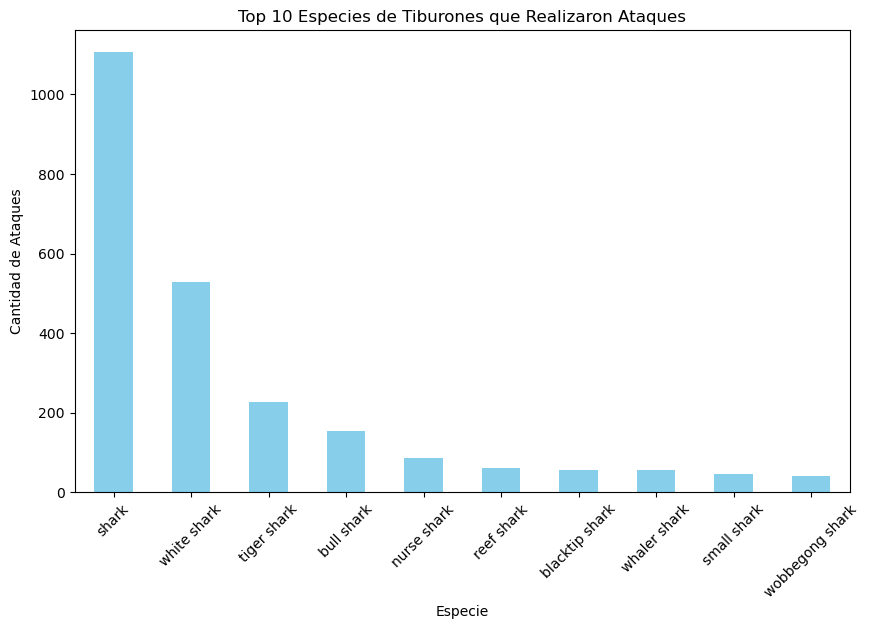

In [44]:
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df y tiene una columna 'species'

# Contar la cantidad de ataques por especie
species_counts = df['species'].value_counts()

# Tomar las 10 especies más comunes (puedes ajustar este número según tus necesidades)
top_species = species_counts.head(10)

# Crear la gráfica
plt.figure(figsize=(10, 6))
top_species.plot(kind='bar', color='skyblue')
plt.title('Top 10 Especies de Tiburones que Realizaron Ataques')
plt.xlabel('Especie')
plt.ylabel('Cantidad de Ataques')
plt.xticks(rotation=45)
plt.show()


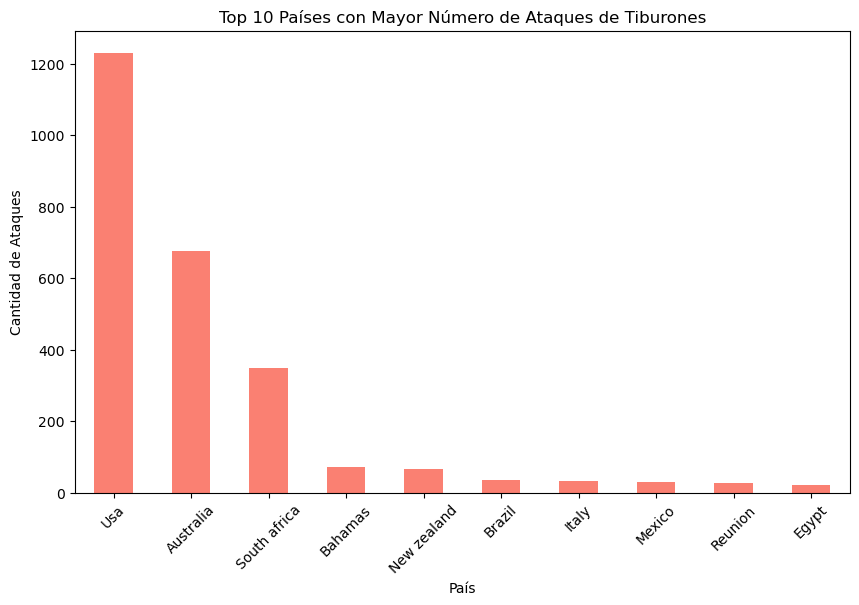

In [45]:
import matplotlib.pyplot as plt
# Contar la cantidad de ataques por país
country_counts = df['country'].value_counts()

# Tomar los 10 países con más ataques
top_countries = country_counts.head(10)

# Crear la gráfica
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='salmon')
plt.title('Top 10 Países con Mayor Número de Ataques de Tiburones')
plt.xlabel('País')
plt.ylabel('Cantidad de Ataques')
plt.xticks(rotation=45)
plt.show()


In [46]:
df.shape

(2974, 24)